<a href="https://www.kaggle.com/code/mikedelong/is-everyone-at-kaggle-ex-google?scriptVersionId=149560134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv(filepath_or_buffer='/kaggle/input/the-official-kaggle-team/TheKaggleTeam.csv', index_col=[0], 
                 parse_dates=['RegisterDate'], )
df['tier 5'] = df['PerformanceTier'] == 5
df['Google'] = df['Bio'].apply(func=lambda x: 'Google' in x)
df.head()

/tmp/ipykernel_20/810100872.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath_or_buffer='/kaggle/input/the-official-kaggle-team/TheKaggleTeam.csv', index_col=[0],


,Id,UserName,DisplayName,Name,Position,Bio,RegisterDate,PerformanceTier,tier 5,Google
0,16460,argv,D. Sculley,D. Sculley,CEO,D. is the CEO at Kaggle. Prior to coming to Ka...,2011-09-16,5,True,True
1,603584,juliaelliott,Julia Elliott,Julia Elliott,COO,"Julia Elliott is Kaggle's COO, overseeing its ...",2016-05-03,5,True,False
2,2505,jeffmoser,Jeff Moser,Jeff Moser,Chief Architect,Good software is a game of inches where polish...,2010-08-21,5,True,False
3,3258,wcukierski,Will Cukierski,William Cukierski,Head of Competitions and Data Scientist,Will Cukierski has a bachelor’s degree in phys...,2010-10-13,5,True,False
4,195039,jeradrose,Jerad Rose,Jerad Rose,Developer,Jerad is a full-stack software engineer with a...,2014-05-12,5,True,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               63 non-null     int64         
 1   UserName         63 non-null     object        
 2   DisplayName      63 non-null     object        
 3   Name             63 non-null     object        
 4   Position         63 non-null     object        
 5   Bio              63 non-null     object        
 6   RegisterDate     63 non-null     datetime64[ns]
 7   PerformanceTier  63 non-null     int64         
 8   tier 5           63 non-null     bool          
 9   Google           63 non-null     bool          
dtypes: bool(2), datetime64[ns](1), int64(2), object(5)
memory usage: 4.6+ KB


In [3]:
from plotly.express import scatter
scatter(data_frame=df, x='RegisterDate', y='Id', hover_name='Name', color='tier 5', hover_data=['Position'])

Shocking that IDs would be issued in sequential order.

Everyone in this dataset is in the same performance tier except one person.

(-0.5, 1199.5, 1199.5, -0.5)

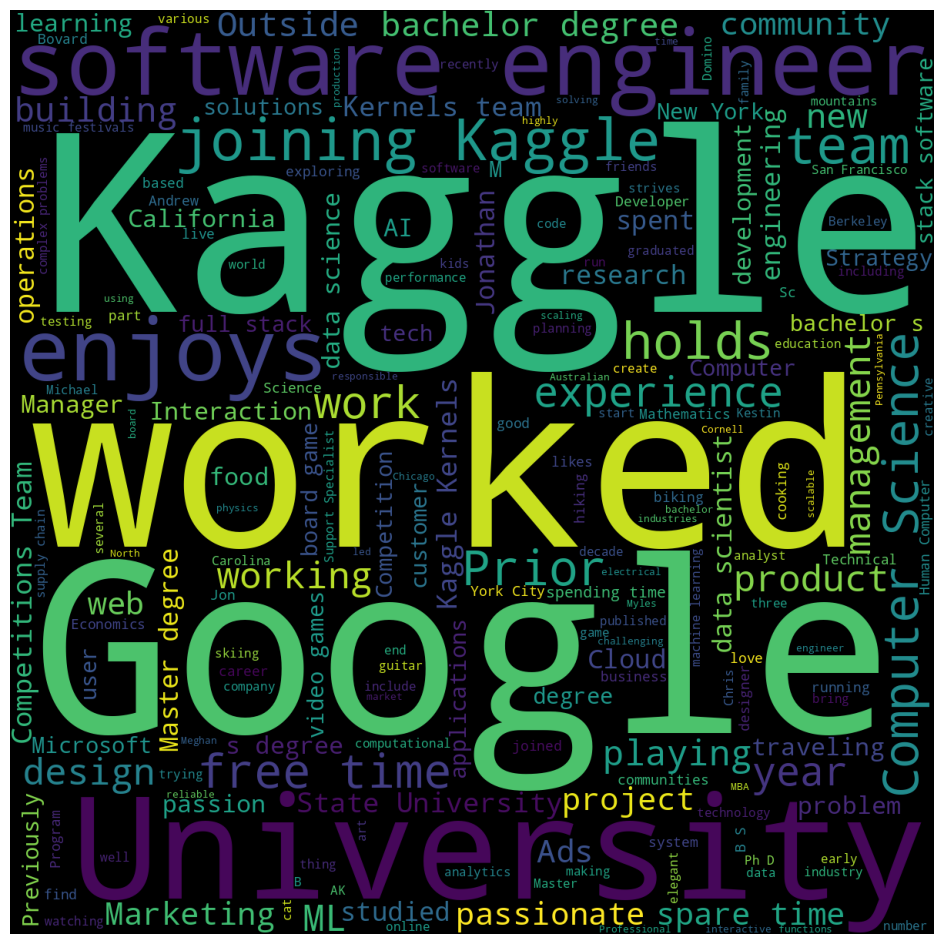

In [4]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(df['Bio'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')


I just learned that there are a lot of people in this dataset with connections to Google, which is something I guess I did not know.

In [5]:
scatter(data_frame=df, x='RegisterDate', y='Id', hover_name='Name', color='Google', hover_data=['Position'])

In [6]:
df['Google'].value_counts()

Google
False    34
True     29
Name: count, dtype: int64

No not everybody at Kaggle mentions Google in their bio; and they don't seem to cluster early or late.